In [43]:
import sys

print("Python Version:", sys.version)

Python Version: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]


In [117]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [162]:
data = keras.datasets.fashion_mnist.load_data()
print(data[0][0].shape, data[0][1].shape,data[1][0].shape, data[1][1].shape)
train, test = data
xtrain, ytrain = train
xtest, ytest = test

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [163]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

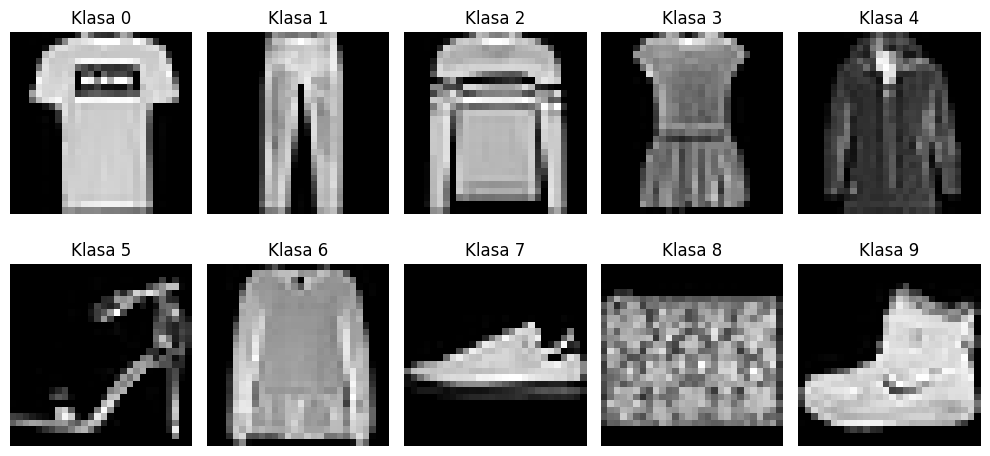

In [164]:
plt.figure(figsize=(10, 5))

for i in range(len(np.unique(ytrain))):  
    indeks = np.where(ytrain == i)[0][0]  # Pronalazi prvi indeks svake klase
    plt.subplot(2, 5, i + 1)  # Pravljenje mreže 2x5
    plt.imshow(xtrain[indeks], cmap='gray')  # Prikazuje sliku
    plt.title(f"Klasa {(i)}")  # Dodaje naslov
    plt.axis('off')  # Uklanja ose

plt.tight_layout()  # Bolje poravnanje
plt.show()

In [165]:
labele = ['Majica', 'Pantalone', 'Džemper', 'Haljina', 'Kaput','Sandale', 'Košulja', 'Patike', 'Torbica', 'Čizme']

In [166]:
xtrain, xdev = xtrain[:50000], xtrain[50000:]
ytrain, ydev = ytrain[:50000], ytrain[50000:]

In [167]:
print(xtrain.shape, xdev.shape)
xtrain = xtrain / xtrain.max()
xdev = xdev / xdev.max()
print(xtrain.max(), xdev.max())

(50000, 28, 28) (10000, 28, 28)
1.0 1.0


In [168]:
model = keras.Sequential()
model.add(keras.Input(shape=xtrain.shape[1:]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation= 'relu'))
model.add(keras.layers.Dense(100, activation= 'relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [169]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [170]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.1), loss=keras.metrics.sparse_categorical_crossentropy, metrics=['accuracy'])

In [171]:
model.fit(xtrain, ytrain, epochs= 30, validation_data= (xdev, ydev))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7488 - loss: 0.7064 - val_accuracy: 0.8349 - val_loss: 0.4517
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8503 - loss: 0.4058 - val_accuracy: 0.7854 - val_loss: 0.5705
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8690 - loss: 0.3555 - val_accuracy: 0.8603 - val_loss: 0.3818
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8737 - loss: 0.3346 - val_accuracy: 0.8680 - val_loss: 0.3573
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8876 - loss: 0.3057 - val_accuracy: 0.8551 - val_loss: 0.3911
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8918 - loss: 0.2872 - val_accuracy: 0.8719 - val_loss: 0.3558
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8995 - loss: 0.2708 - val_accuracy: 0.8798 - val_loss: 0.3214
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9026 - loss: 0

In [173]:
model.save("fashionMNISTmodel.keras")